In [76]:
library(ggplot2)
library(dplyr)
library(cowplot)

In [77]:
metadata <- read.delim("../Metadata.txt", sep="\t", header=TRUE)

In [152]:
run_type_counts <- metadata %>%
  filter(target != "Control") %>%
  group_by(run_type) %>%
  summarise(count = n_distinct(exp))

Saving 6.67 x 6.67 in image


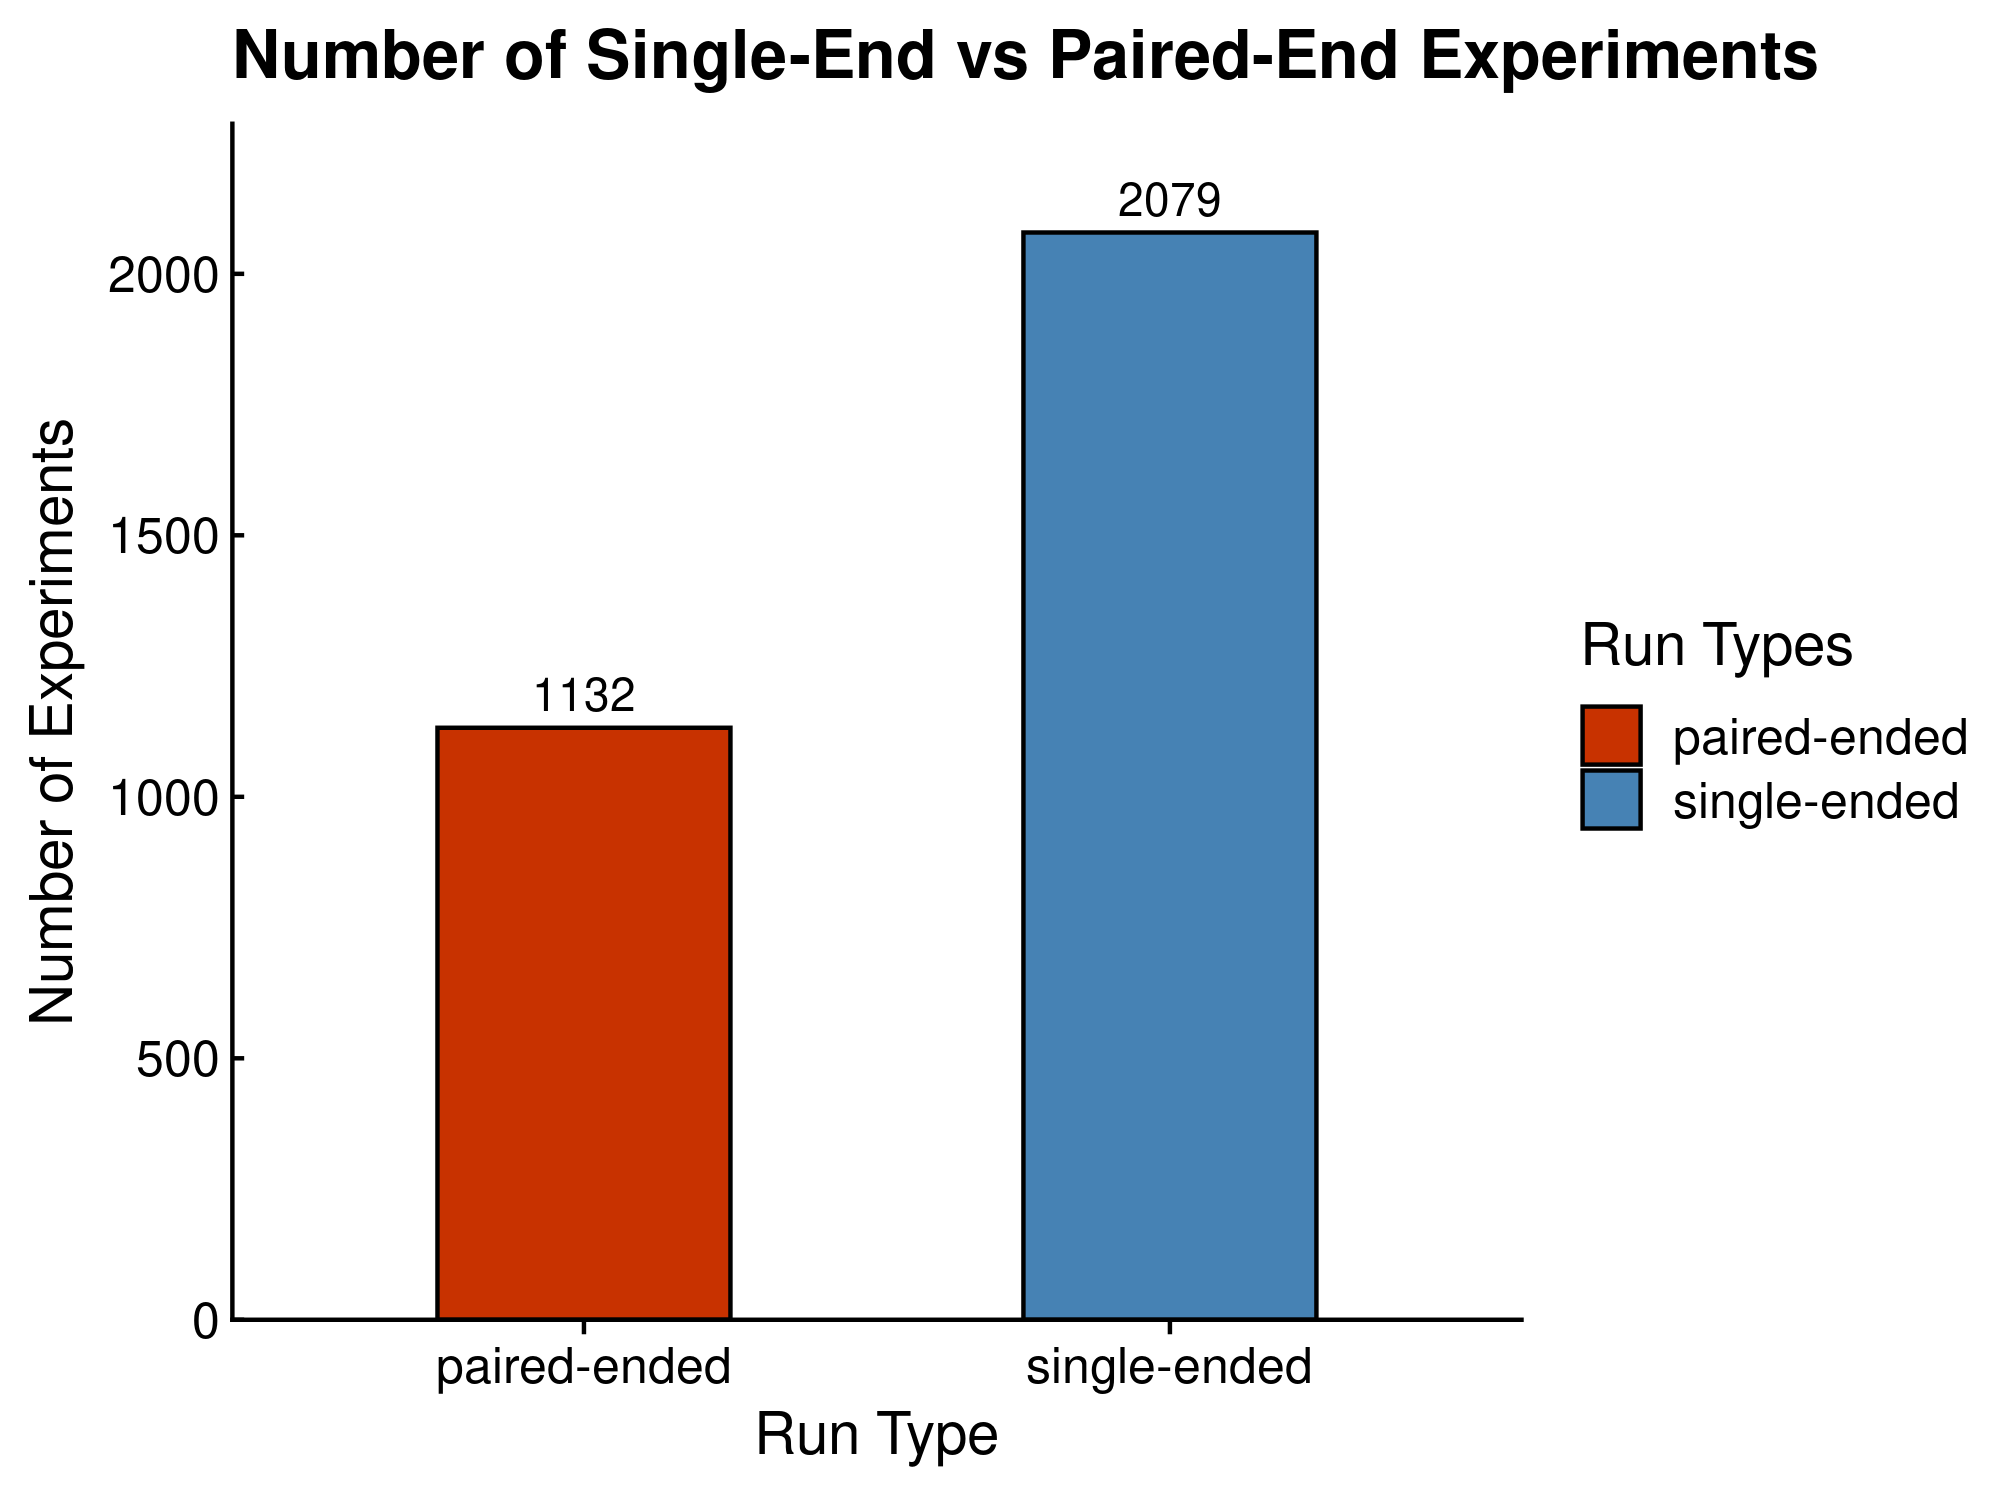

In [205]:
options(repr.plot.width = 6.7, repr.plot.height = 5, repr.plot.res = 300)

plot1 <- ggplot(run_type_counts, aes(x = run_type, y = count, fill = run_type)) +
  geom_bar(stat = "identity", color = "Black", width = 0.5) +
    geom_text(aes(label = count), vjust = -0.5) +
    scale_x_discrete() + 
    scale_y_continuous(expand = c(0,0), limits = c(0,1.1*2079)) + 
    labs(title = "Number of Single-End vs Paired-End Experiments",
       x = "Run Type",
       y = "Number of Experiments") +
    theme_cowplot() +
    theme(axis.ticks.length.y = unit(-0.1,'cm')) + 
    scale_fill_manual("Run Types", values = c("single-ended" = "#4682B4", "paired-ended" = "#C83200"))

ggsave("SEvPE-experiments.png", plot = plot1)

plot1

In [200]:
read_length_counts <- metadata %>%
  filter(target != "Control") %>%
  group_by(read_length) %>%
  summarise(count = n_distinct(exp)) %>%
  arrange(desc(count)) %>%
  mutate(alpha = if_else(read_length > 50, 1, 0.35))

Saving 6.67 x 6.67 in image


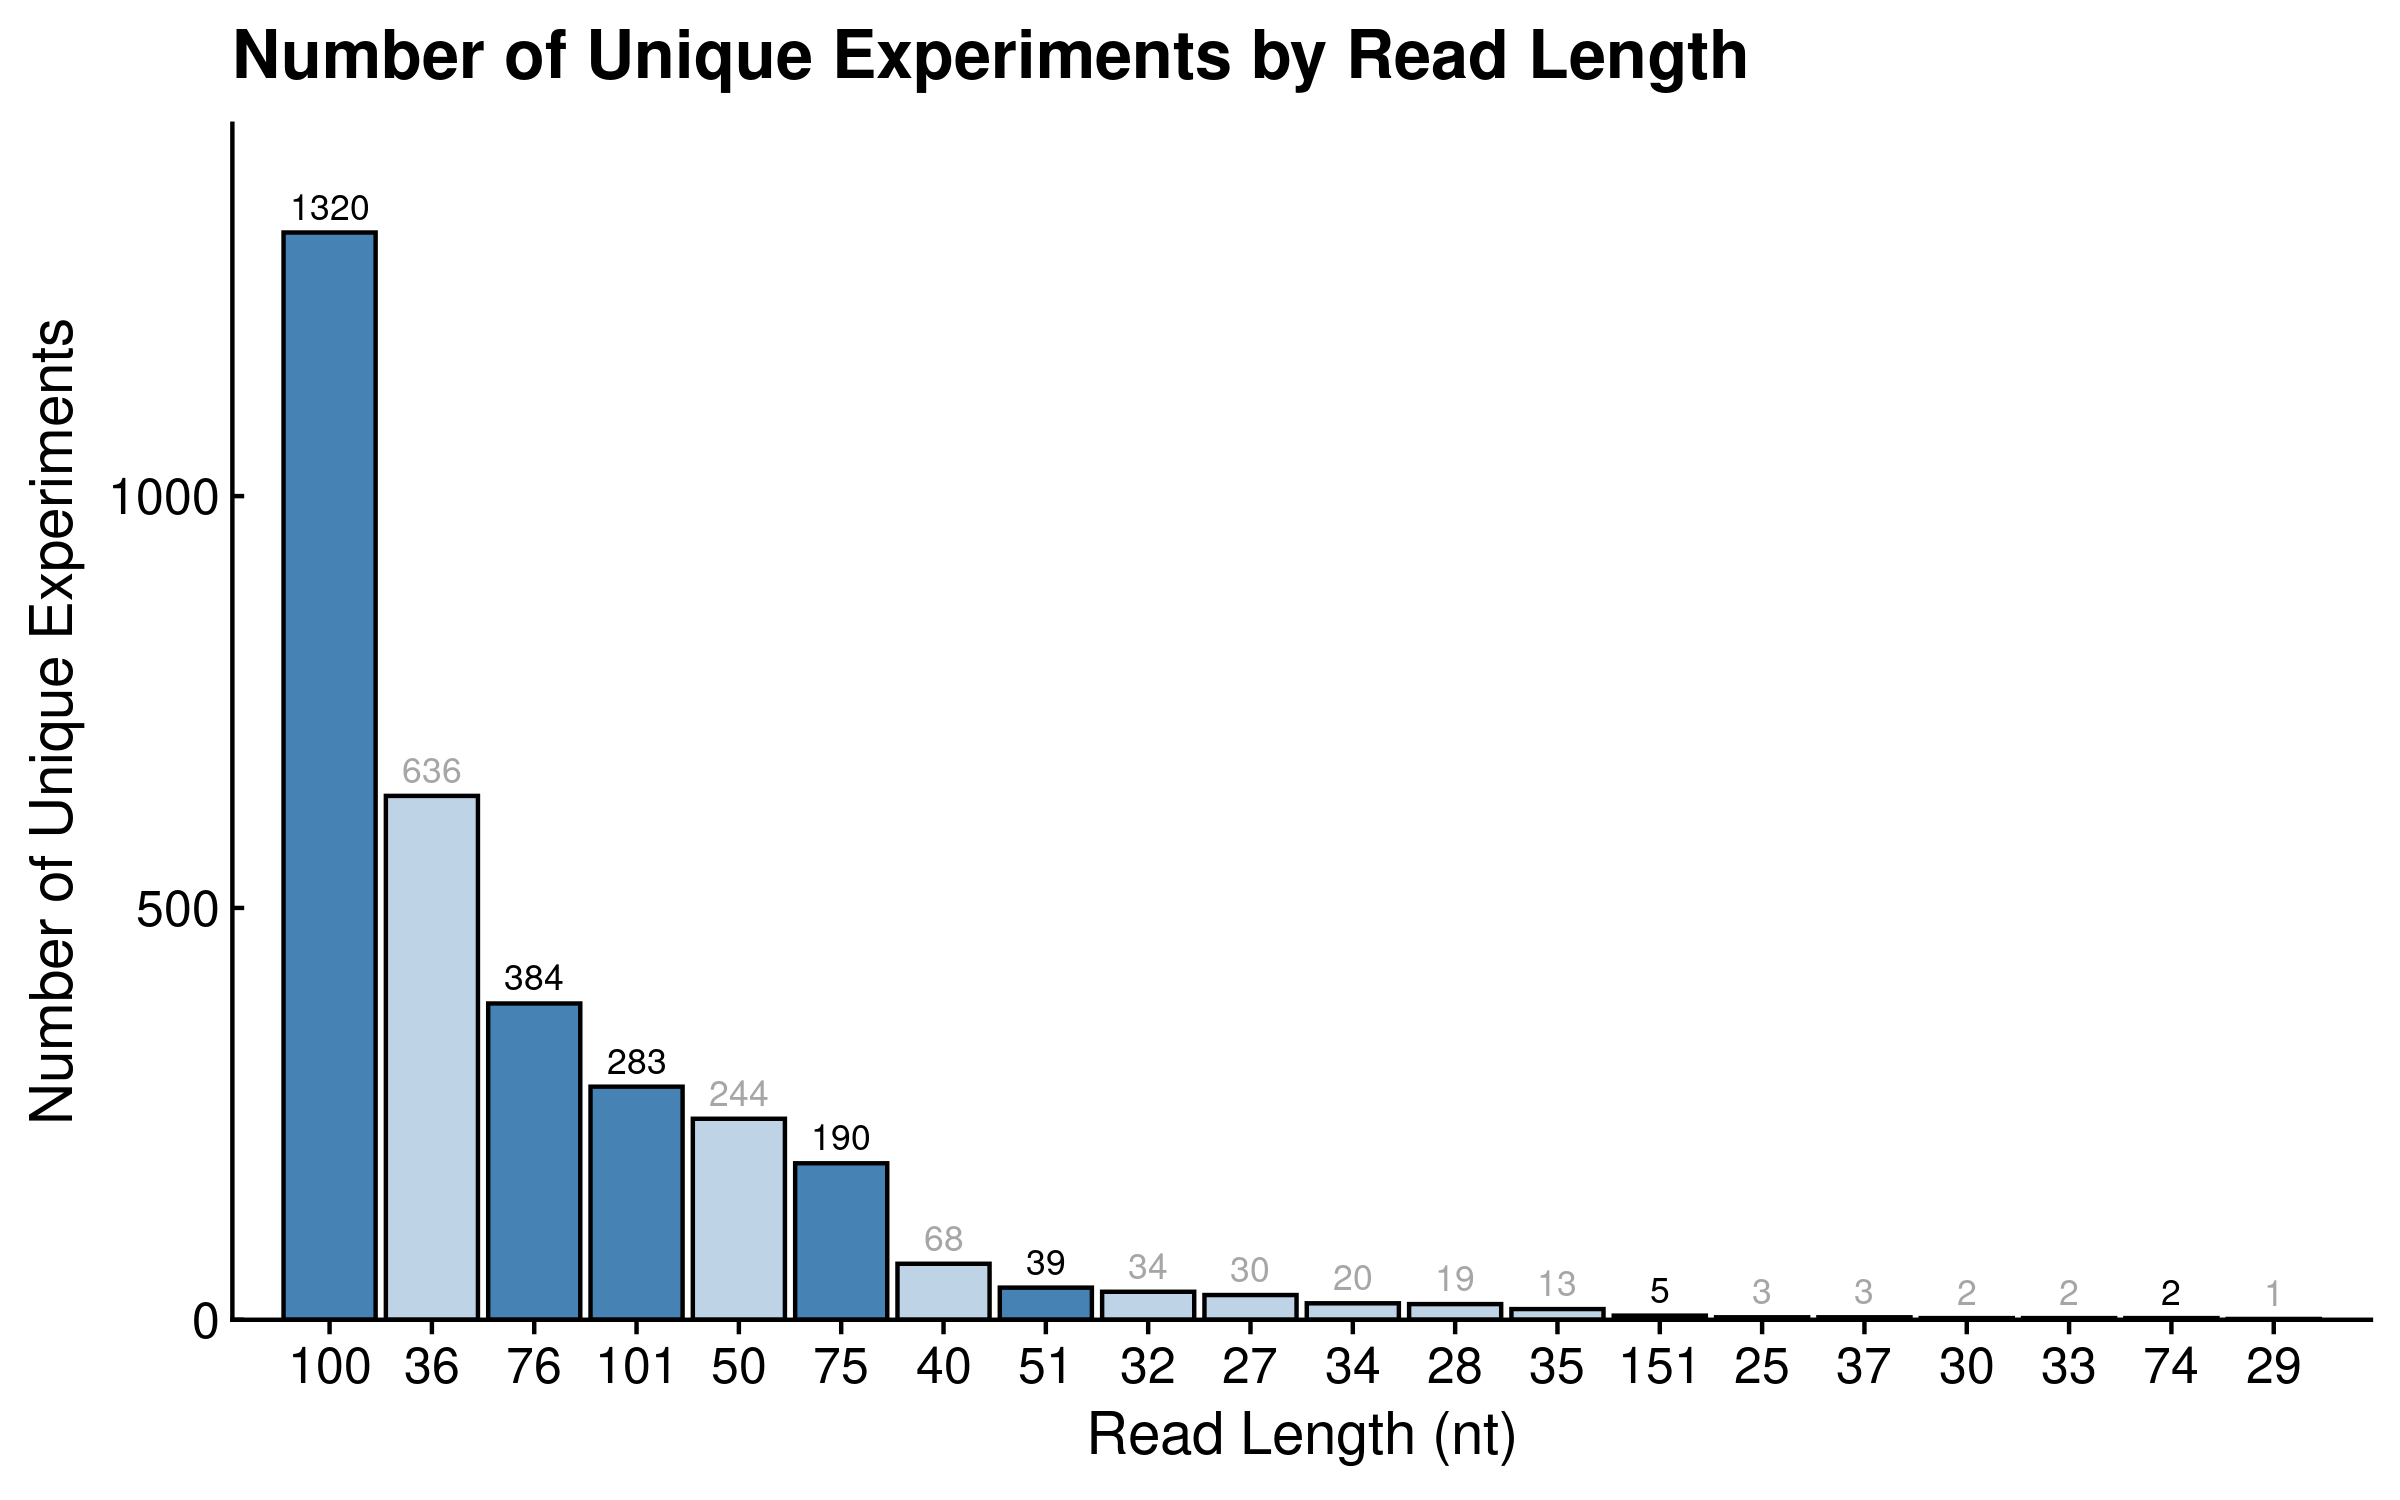

In [201]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 300)

plot2 <- ggplot(read_length_counts, aes(x = reorder(as.factor(read_length), -count), y = count, alpha = alpha)) +
  geom_bar(stat = "identity", fill = "steelblue", color = "black") +
  geom_text(aes(label = count), vjust = -0.5, size = 3) +
  scale_x_discrete(expand = c(0.05,0)) + 
  scale_y_continuous(expand = c(0,0), limits = c(0,1.1*1320)) +
  scale_alpha_identity() +
  labs(title = "Number of Unique Experiments by Read Length",
       x = "Read Length (nt)",
       y = "Number of Unique Experiments") +
  theme_cowplot() +
  theme(axis.text.x = element_text(hjust = 0.5), 
        legend.position = "none", 
        axis.ticks.length.y = unit(-0.1,'cm'))

ggsave("readlen-experiments.png", plot = plot2)

plot2